In [ ]:
!pip install catboost

# Importing Libraries and Dataset


In [ ]:
# importing required libraries
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, SGDRegressor, LinearRegression
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_log_error, mean_squared_error, accuracy_score, r2_score

warnings.filterwarnings("ignore")

In [ ]:
# reading in the train, test dataset
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
id_test = df_test['Id']
print(df_train.shape)
print(df_test.shape)

(1460, 81)
(1459, 80)


In [ ]:
pd.options.display.max_rows = 40
pd.options.display.max_columns = None
plt.rcParams["figure.figsize"] = (18, 8)

# Data Preprocessing

In [ ]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
# dropping 'Id' column from datasets
df_train.drop(columns='Id', inplace=True)
df_test.drop(columns='Id', inplace=True)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [ ]:
df_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


**Missing Data**

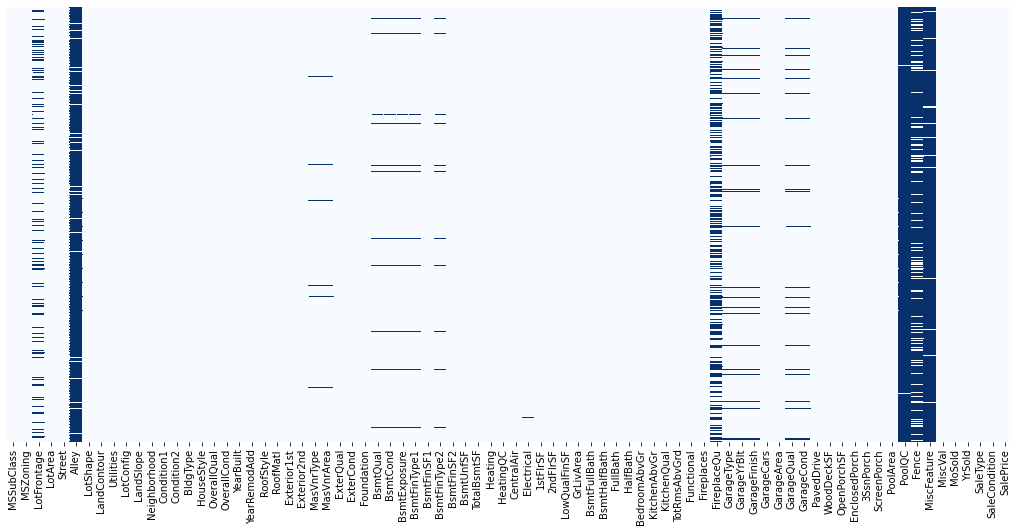

In [ ]:
# missing data 
sns.heatmap(df_train.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels=df_train.columns)

In [ ]:
# cloumns of 'Alley', 'MiscFeature', 'PoolQC', 'FireplaceQU', 'Fence' got a large number of missing values, 
# so its better to drop these columns
df_train = df_train.drop(columns=['Alley', 'MiscFeature', 'PoolQC', 'FireplaceQu', 'Fence'])
df_test = df_test.drop(columns=['Alley', 'MiscFeature', 'PoolQC', 'FireplaceQu', 'Fence'])

In [ ]:
feature_cols = [col for col in df_train.columns if col not in ['SalePrice']]
target_col = ['SalePrice']
categorical_cols = [col for col in feature_cols if df_train[col].dtype=='O']
numeric_cols = [col for col in feature_cols if col not in categorical_cols]

In [ ]:
df_train[numeric_cols].isnull().sum()

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [ ]:
df_train[categorical_cols].isnull().sum()

MSZoning          0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
KitchenQual       0
Functional        0
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
PavedDrive        0
SaleType          0
SaleCondition     0
dtype: int64

In [ ]:
# creating numerical part of the original dataframe
df_train_numerical = df_train.select_dtypes(include=['int64', 'float64'])
df_train_numerical.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


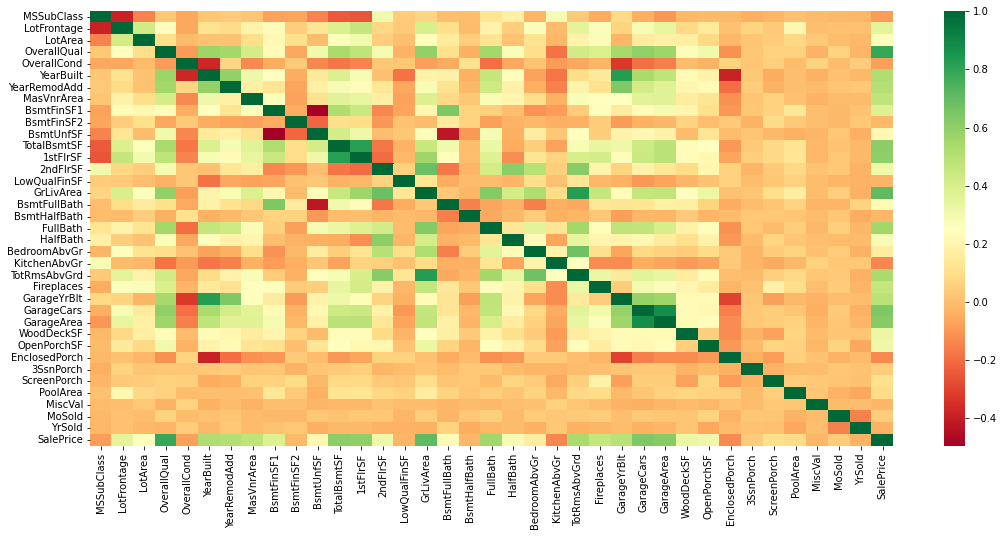

In [ ]:
# creating correlation matrix to gain more insights about numeric data 
corrmat = df_train_numerical.corr()
sns.heatmap(corrmat, cmap='RdYlGn')

In [ ]:
# as feature - LotFrontage is very less correlated with SalePrice, and it contains many missing values too
# so better remove it from the df.
df_train.drop(columns='LotFrontage', inplace=True)
df_test.drop(columns='LotFrontage', inplace=True)

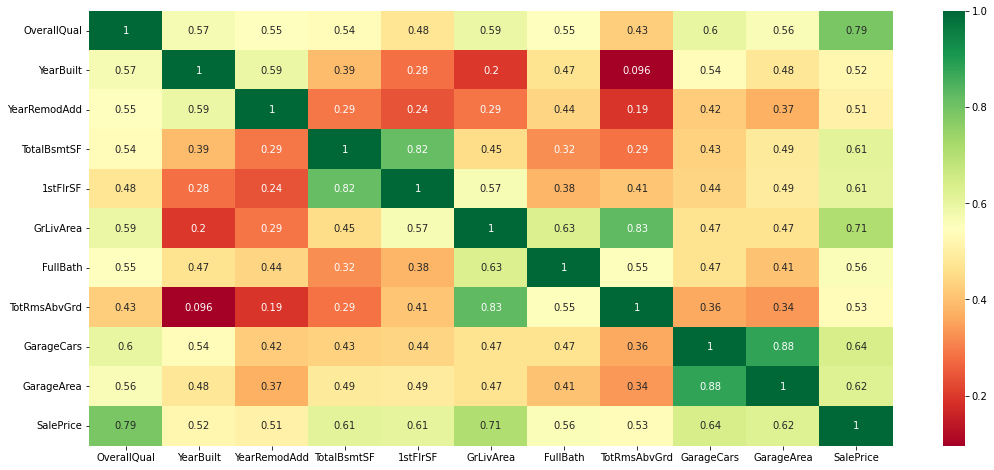

In [ ]:
t_corr=corrmat.index[abs(corrmat['SalePrice'])>0.5]
sns.heatmap(df_train_numerical[t_corr].corr(),annot=True,cmap="RdYlGn")

**Removing Outliers from the data**

In [ ]:
# based on correlation matrix
def Outlier(X, Y, str1="feature1"):
  plt.scatter(X, Y)
  plt.title(str1 +" vs. SalePrice")
  plt.xlabel(str1)
  plt.ylabel("SalePrice")

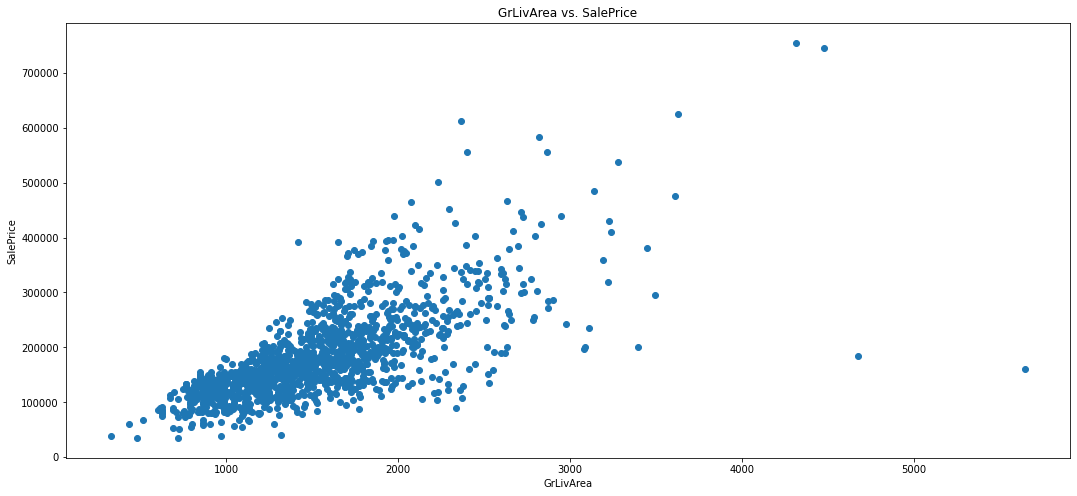

In [ ]:
Outlier(df_train.GrLivArea, df_train['SalePrice'], "GrLivArea")

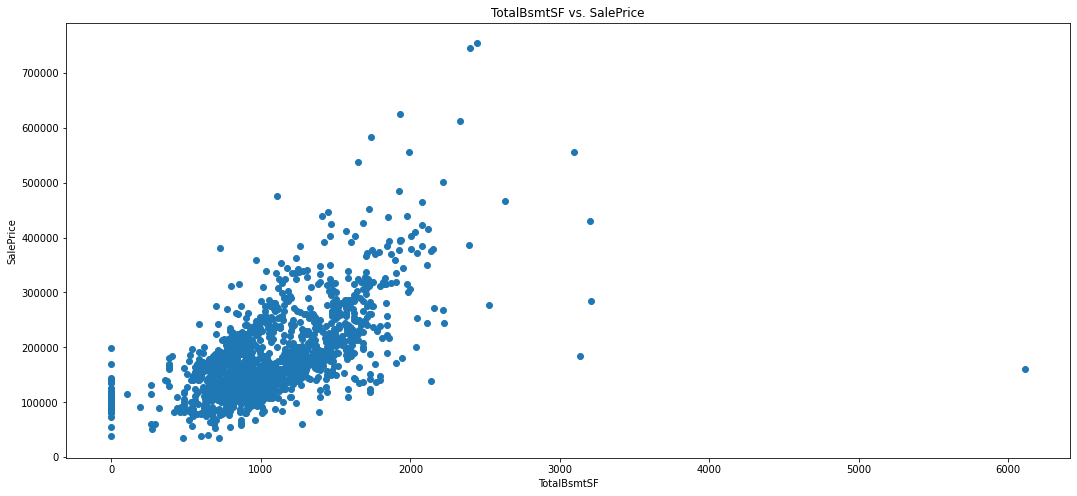

In [ ]:
Outlier(df_train.TotalBsmtSF, df_train['SalePrice'], "TotalBsmtSF")

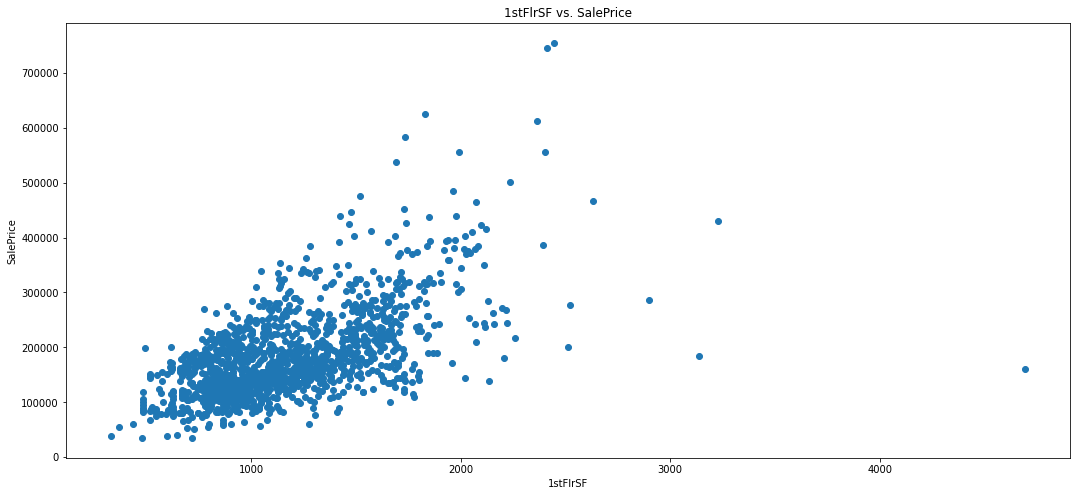

In [ ]:
Outlier(df_train['1stFlrSF'], df_train['SalePrice'], "1stFlrSF")

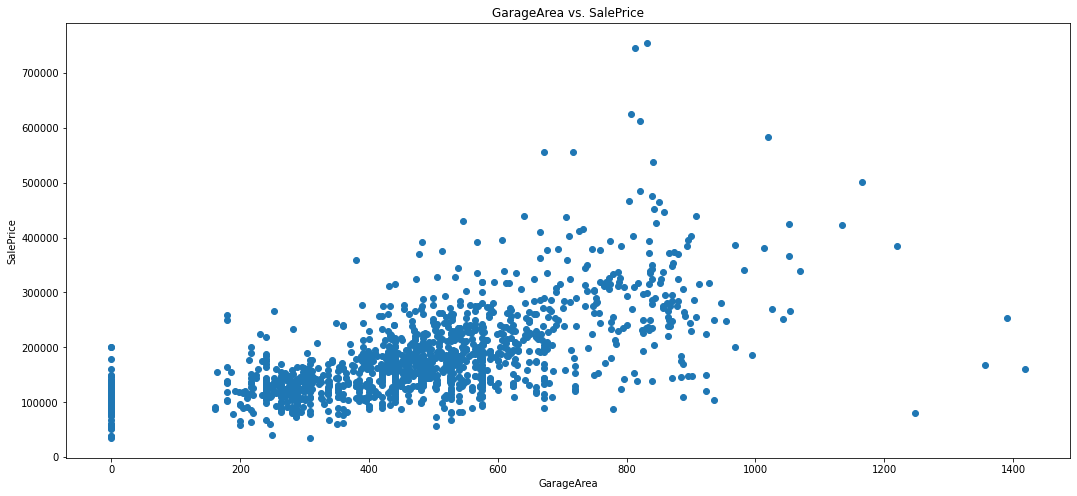

In [ ]:
Outlier(df_train.GarageArea, df_train['SalePrice'], "GarageArea")

In [ ]:
# removing ouliers
df_train = df_train.drop(df_train[df_train['GrLivArea']>4000].index)
df_train = df_train.drop(df_train[df_train['TotalBsmtSF']>3000].index)
df_train = df_train.drop(df_train[df_train['1stFlrSF']>2750].index)
df_train = df_train.drop(df_train[df_train['GarageArea']>1200].index)

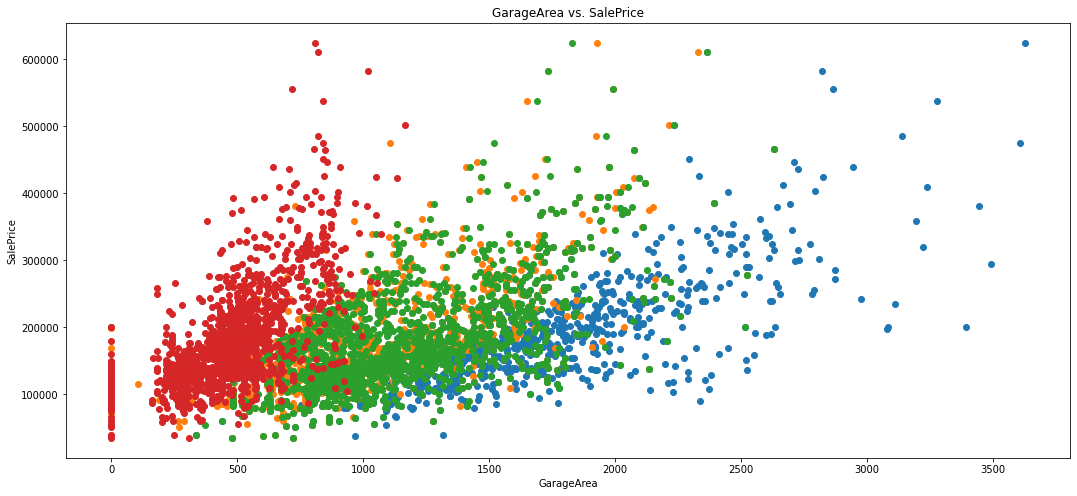

In [ ]:
# checking
Outlier(df_train.GrLivArea, df_train['SalePrice'], "GrLivArea")
Outlier(df_train.TotalBsmtSF, df_train['SalePrice'], "TotalBsmtSF")
Outlier(df_train['1stFlrSF'], df_train['SalePrice'], "1stFlrSF")
Outlier(df_train.GarageArea, df_train['SalePrice'], "GarageArea")

Creating copies of datasets

In [ ]:
X_train = df_train.loc[:, 'MSSubClass':'SaleCondition']
y_train = df_train['SalePrice']
print(X_train.shape, y_train.shape)

(1448, 73) (1448,)


In [ ]:
X_test = df_test.loc[:, 'MSSubClass':'SaleCondition']
print(X_test.shape)

(1459, 73)


**Handling Missing Data**

for training data

In [ ]:
missing_cells = df_train.isnull().sum().sum()
total_cells = np.product(df_train.shape)

percent_missing = (missing_cells/total_cells)*100
percent_missing

0.567418246976258

In [ ]:
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorc

In [ ]:
df_train.loc[:, 'MSSubClass':'Heating'].isnull().sum()

MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       8
MasVnrArea       8
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinSF1       0
BsmtFinType2    37
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
dtype: int64

In [ ]:
df_train.loc[:, 'HeatingQC':'SalePrice'].isnull().sum()

HeatingQC         0
CentralAir        0
Electrical        1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
KitchenQual       0
TotRmsAbvGrd      0
Functional        0
Fireplaces        0
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageCars        0
GarageArea        0
GarageQual       81
GarageCond       81
PavedDrive        0
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
MiscVal           0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
SalePrice         0
dtype: int64

In [ ]:
# creating columns depending on the imputing value for missing values of training set
columns_na_to_None = ['BsmtQual',
                      'BsmtCond',
                      'BsmtExposure',
                      'BsmtFinType1',
                      'BsmtFinType2',
                      'GarageType',
                      'GarageFinish',
                      'GarageQual',
                      'GarageCond']

columns_na_to_mf = ['MasVnrType',
                    'Electrical']

columns_na_to_avg = ['MasVnrArea',
                     'GarageYrBlt']

In [ ]:
for column in columns_na_to_None:
  imputer1 = SimpleImputer(missing_values = np.nan, strategy='constant', fill_value='None')
  imputer1.fit(X_train.loc[:, columns_na_to_None])
  X_train.loc[:, columns_na_to_None] = imputer1.transform(X_train.loc[:, columns_na_to_None])

for column in columns_na_to_mf:
  imputer2 = SimpleImputer(missing_values = np.nan, strategy='most_frequent')
  imputer2.fit(X_train.loc[:, columns_na_to_mf])
  X_train.loc[:, columns_na_to_mf] = imputer2.transform(X_train.loc[:, columns_na_to_mf])

for column in columns_na_to_avg:
  imputer3 = SimpleImputer(missing_values = np.nan, strategy='mean')
  imputer3.fit(X_train.loc[:, columns_na_to_avg])
  X_train.loc[:, columns_na_to_avg] = imputer3.transform(X_train.loc[:, columns_na_to_avg])

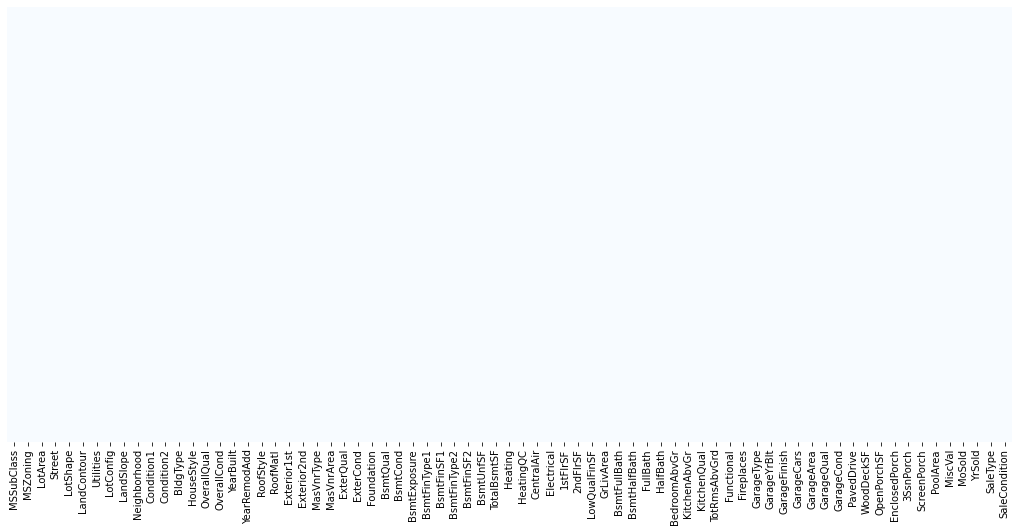

In [ ]:
# check if any feature has missing values
sns.heatmap(X_train.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels=X_train.columns)

for testing data

In [ ]:
missing_cells = df_test.isnull().sum().sum()
total_cells = np.product(df_test.shape)

percent_missing = (missing_cells/total_cells)*100
percent_missing

0.6177997690292657

In [ ]:
df_test.loc[:, 'MSSubClass':'Heating'].isnull().sum()

MSSubClass       0
MSZoning         4
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        2
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      1
Exterior2nd      1
MasVnrType      16
MasVnrArea      15
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual        44
BsmtCond        45
BsmtExposure    44
BsmtFinType1    42
BsmtFinSF1       1
BsmtFinType2    42
BsmtFinSF2       1
BsmtUnfSF        1
TotalBsmtSF      1
Heating          0
dtype: int64

In [ ]:
df_test.loc[:, 'HeatingQC':'SaleCondition'].isnull().sum()

HeatingQC         0
CentralAir        0
Electrical        0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      2
BsmtHalfBath      2
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
KitchenQual       1
TotRmsAbvGrd      0
Functional        2
Fireplaces        0
GarageType       76
GarageYrBlt      78
GarageFinish     78
GarageCars        1
GarageArea        1
GarageQual       78
GarageCond       78
PavedDrive        0
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
MiscVal           0
MoSold            0
YrSold            0
SaleType          1
SaleCondition     0
dtype: int64

In [ ]:
# creating columns depending on the imputing value for missing values of testing set
columns_na_to_None = ['BsmtQual',
                      'BsmtCond',
                      'BsmtExposure',
                      'BsmtFinType1',
                      'BsmtFinType2',
                      'GarageType',
                      'GarageFinish',
                      'GarageQual',
                      'GarageCond']

columns_na_to_mf = ['MSZoning',
                    'Utilities',
                    'Exterior1st',
                    'Exterior2nd',
                    'MasVnrType',
                    'KitchenQual',
                    'Functional',
                    'SaleType']

columns_na_to_avg = ['MasVnrArea',
                     'BsmtFinSF1',
                     'BsmtFinSF2',
                     'BsmtUnfSF',
                     'TotalBsmtSF',
                     'GarageYrBlt']

columns_na_to_0 = ['BsmtFullBath',
                   'BsmtHalfBath',
                   'GarageCars',
                   'GarageArea']   

In [ ]:
for column in columns_na_to_None:
  imputer4 = SimpleImputer(missing_values = np.nan, strategy='constant', fill_value='None')
  imputer4.fit(X_test.loc[:, columns_na_to_None])
  X_test.loc[:, columns_na_to_None] = imputer4.transform(X_test.loc[:, columns_na_to_None])

for column in columns_na_to_mf:
  imputer5 = SimpleImputer(missing_values = np.nan, strategy='most_frequent')
  imputer5.fit(X_test.loc[:, columns_na_to_mf])
  X_test.loc[:, columns_na_to_mf] = imputer5.transform(X_test.loc[:, columns_na_to_mf])

for column in columns_na_to_avg:
  imputer6 = SimpleImputer(missing_values = np.nan, strategy='mean')
  imputer6.fit(X_test.loc[:, columns_na_to_avg])
  X_test.loc[:, columns_na_to_avg] = imputer6.transform(X_test.loc[:, columns_na_to_avg])

for column in columns_na_to_0:
  imputer7 = SimpleImputer(missing_values = np.nan, strategy='constant', fill_value=0)
  imputer7.fit(X_test.loc[:, columns_na_to_0])
  X_test.loc[:, columns_na_to_0] = imputer7.transform(X_test.loc[:, columns_na_to_0])

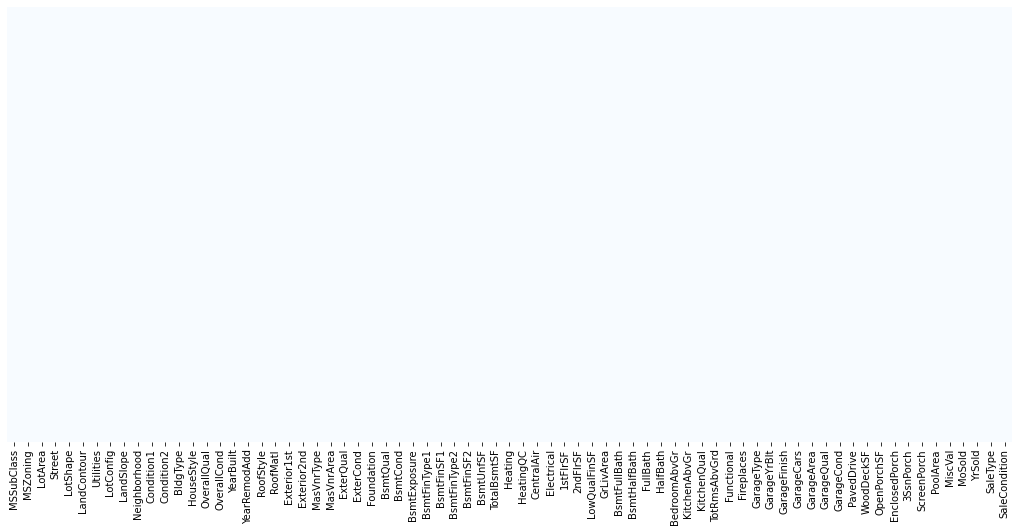

In [ ]:
# check if any feature has missing values
sns.heatmap(X_test.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels=X_test.columns)

**Feature Extraction**

In [ ]:
# first for training set
# assumption: OverallQual, OverallCond, ..., all these columns add to total house_worth
X_train['Total_Bathrooms'] = X_train['BsmtFullBath']+X_train['FullBath']+0.5*(X_train['BsmtHalfBath']+X_train['HalfBath'])
X_train['House_year'] = 0.5*(X_train['YearBuilt']+X_train['YearRemodAdd'])

# now for testing set
X_test['Total_Bathrooms'] = X_test['BsmtFullBath']+X_test['FullBath']+0.5*(X_test['BsmtHalfBath']+X_test['HalfBath'])
X_test['House_year'] = 0.5*(X_test['YearBuilt']+X_test['YearRemodAdd'])

In [ ]:
X_train.drop(columns=['BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath', 'YearBuilt', 'YearRemodAdd'], inplace=True)
X_test.drop(columns=['BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath', 'YearBuilt', 'YearRemodAdd'], inplace=True)
print(X_train.shape)
print(X_test.shape)

(1448, 69)
(1459, 69)


**Categorical Encoding**

In [ ]:
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

print(X_train_encoded.shape, X_test_encoded.shape)

(1448, 272) (1459, 258)


In [ ]:
# as shape isn't equal, and #columns exceed in X_train_encoded than X_test_encoded, we will delete some columns 
# from X_train_encoded, and repeating the same with X_test_encoded, if needed

list1 = list(X_train_encoded.columns)
list2 = list(X_test_encoded.columns)

for column in list1:
  if column not in list2:
    X_train_encoded.drop(columns=column, inplace=True)
    
for column in list2:
  if column not in list1:
    X_test_encoded.drop(columns=column, inplace=True)
    
print(X_train_encoded.shape)
print(X_test_encoded.shape)

(1448, 257)
(1459, 257)


**Feature Scaling**

In [ ]:
# as some values in the dataset are large, its better to scale these features
# before all, we first need to separate numeric columns from all to apply feature scaling

# Numeric Columns
numeric_columns = []
object_columns = []
for column in X_train.columns:
  if X_train[column].dtype == object:
    object_columns.append(column)
  else:
    numeric_columns.append(column)

In [ ]:
sc_x = StandardScaler()
sc_y = StandardScaler()

X_train_encoded.loc[:, numeric_columns] = sc_x.fit_transform(X_train_encoded.loc[:, numeric_columns])
X_test_encoded.loc[:, numeric_columns] = sc_x.transform(X_test_encoded.loc[:, numeric_columns])
y_train = sc_y.fit_transform(y_train.array.reshape(-1,1))

**Model Selection and Training**

In [ ]:
X = X_train_encoded
y = y_train.ravel()

In [ ]:
# choosing models to train and test

models = {
    "ridge": Ridge(),
    "SGD": SGDRegressor(),
    "xg": XGBRegressor(n_estimators=1000),
    "catboost": CatBoostRegressor(),
    "gradientB": GradientBoostingRegressor(),
    "DecisionTree": DecisionTreeRegressor(),
    "Adaboost": AdaBoostRegressor(),
    "randomforest": RandomForestRegressor(n_estimators=1000),
    "svr_rbf": SVR(kernel="rbf"),
    "svr_lin": SVR(kernel="linear"),
    "svr_poly": SVR(kernel="poly"),
}

In [ ]:
# applying k-fold cross-validation

for name, model in models.items():
  accuracies = cross_val_score(estimator = model, X = X, y = y.ravel(), cv = 10)
  print(name, "Accuracy: {:.2f} %".format(accuracies.mean()*100))
  print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [ ]:
# Model ==> Accuracy, Standard Deviation

# ridge        ==> 90.67%, 0.88%
# SGD          ==> 90.82%, 1.06%
# xg           ==> 89.43%, 1.63%
# catboost     ==> 92.21%, 1.14%
# gradientB    ==> 91.28%, 1.32%
# DecisionTree ==> 77.60%, 3.98%
# AdaBoost     ==> 82.98%, 1.85%
# randomforest ==> 89.01%, 1.83%
# svr_rbf      ==> 88.84%, 2.45%
# svr_lin      ==> 90.79%, 0.93%
# svr_poly     ==> 92.54%, 1.39%

In [ ]:
# best fit models are -> CatBoostRegressor(), SVR(kernel='poly'), GradientBoostingRegressor(), SVR(kernel='linear')

train_final, validation_final, y_train_final, y_validation_final = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Metrics

**CatBoostRegressor()**

In [ ]:
y_validation_final_copy = y_validation_final.copy()
model1 = CatBoostRegressor()
model1.fit(train_final, y_train_final)
y_validation_pred = model1.predict(validation_final)

In [ ]:
print("MSE:", mean_squared_error(sc_y.inverse_transform(y_validation_final_copy.reshape(-1, 1)), sc_y.inverse_transform(y_validation_pred.reshape(-1, 1))))
print("MSlogE:", mean_squared_log_error(sc_y.inverse_transform(y_validation_final_copy.reshape(-1, 1)), sc_y.inverse_transform(y_validation_pred.reshape(-1, 1))))
print("R2 Score:", r2_score(sc_y.inverse_transform(y_validation_final_copy.reshape(-1, 1)), sc_y.inverse_transform(y_validation_pred.reshape(-1, 1))))

MSE: 499646836.4790454
MSlogE: 0.009779549104923003
R2 Score: 0.928533689668686


**SVR(kernel='poly')**

In [ ]:
y_validation_final_copy = y_validation_final.copy()
model2 = SVR(kernel='poly')
model2.fit(train_final, y_train_final)
y_validation_pred = model2.predict(validation_final)

In [ ]:
print("MSE:", mean_squared_error(sc_y.inverse_transform(y_validation_final_copy.reshape(-1, 1)), sc_y.inverse_transform(y_validation_pred.reshape(-1, 1))))
print("MSlogE:", mean_squared_log_error(sc_y.inverse_transform(y_validation_final_copy.reshape(-1, 1)), sc_y.inverse_transform(y_validation_pred.reshape(-1, 1))))
print("R2 Score:", r2_score(sc_y.inverse_transform(y_validation_final_copy.reshape(-1, 1)), sc_y.inverse_transform(y_validation_pred.reshape(-1, 1))))

MSE: 355015328.96901053
MSlogE: 0.010336136341917462
R2 Score: 0.9492208619767036


**GradientBoostingRegressor()**

In [ ]:
y_validation_final_copy = y_validation_final.copy()
model3 = GradientBoostingRegressor()
model3.fit(train_final, y_train_final)
y_validation_pred = model3.predict(validation_final)

In [ ]:
print("MSE:", mean_squared_error(sc_y.inverse_transform(y_validation_final_copy.reshape(-1, 1)), sc_y.inverse_transform(y_validation_pred.reshape(-1, 1))))
print("MSlogE:", mean_squared_log_error(sc_y.inverse_transform(y_validation_final_copy.reshape(-1, 1)), sc_y.inverse_transform(y_validation_pred.reshape(-1, 1))))
print("R2 Score:", r2_score(sc_y.inverse_transform(y_validation_final_copy.reshape(-1, 1)), sc_y.inverse_transform(y_validation_pred.reshape(-1, 1))))

MSE: 576369090.3700897
MSlogE: 0.011516889162237334
R2 Score: 0.9175598257200344


**SVR(kernel='linear')**

In [ ]:
y_validation_final_copy = y_validation_final.copy()
model4 = SVR(kernel='linear')
model4.fit(train_final, y_train_final)
y_validation_pred = model4.predict(validation_final)

In [ ]:
print("MSE:", mean_squared_error(sc_y.inverse_transform(y_validation_final_copy.reshape(-1, 1)), sc_y.inverse_transform(y_validation_pred.reshape(-1, 1))))
print("MSlogE:", mean_squared_log_error(sc_y.inverse_transform(y_validation_final_copy.reshape(-1, 1)), sc_y.inverse_transform(y_validation_pred.reshape(-1, 1))))
print("R2 Score:", r2_score(sc_y.inverse_transform(y_validation_final_copy.reshape(-1, 1)), sc_y.inverse_transform(y_validation_pred.reshape(-1, 1))))

MSE: 659641000.3740586
MSlogE: 0.014333618645462844
R2 Score: 0.9056491405565659


# Submission

In [ ]:
# Best fit model after comparing the above results can be CatBoostRegressor()

sub_pred = sc_y.inverse_transform(model1.predict(X_test_encoded).reshape(-1,1))
my_submission = pd.DataFrame({'Id': id_test, 'SalePrice': sub_pred.ravel()})
my_submission.to_csv('submission.csv', index=False)